In [48]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
ds = pd.read_csv('dataset/titanic.csv')

In [95]:
for col in ds.columns:
    print(col)

Survived
Pclass
Sex
Age
SibSp
Parch
Fare


In [100]:
print(ds.iloc[0])

Survived     0.00
Pclass       3.00
Sex          0.00
Age         22.00
SibSp        1.00
Parch        0.00
Fare         7.25
Name: 0, dtype: float64


In [72]:
ds.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [75]:
ds.head()
print(ds)

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare
0           0       3    0  22.0      1      0    7.2500
1           1       1    1  38.0      1      0   71.2833
2           1       3    1  26.0      0      0    7.9250
3           1       1    1  35.0      1      0   53.1000
4           0       3    0  35.0      0      0    8.0500
5           0       1    0  54.0      0      0   51.8625
6           0       3    0   2.0      3      1   21.0750
7           1       3    1  27.0      0      2   11.1333
8           1       2    1  14.0      1      0   30.0708
9           1       3    1   4.0      1      1   16.7000
10          1       1    1  58.0      0      0   26.5500
11          0       3    0  20.0      0      0    8.0500
12          0       3    0  39.0      1      5   31.2750
13          0       3    1  14.0      0      0    7.8542
14          1       2    1  55.0      0      0   16.0000
15          0       3    0   2.0      4      1   29.1250
16          0       3    1  31.

In [94]:
data = np.array(ds)
print(data)
print(data[0])

[[ 0.      3.      0.     ...  1.      0.      7.25  ]
 [ 1.      1.      1.     ...  1.      0.     71.2833]
 [ 1.      3.      1.     ...  0.      0.      7.925 ]
 ...
 [ 1.      1.      1.     ...  0.      0.     30.    ]
 [ 1.      1.      0.     ...  0.      0.     30.    ]
 [ 0.      3.      0.     ...  0.      0.      7.75  ]]
[ 0.    3.    0.   22.    1.    0.    7.25]


In [93]:
for i in ds:
    print(i)

Survived
Pclass
Sex
Age
SibSp
Parch
Fare


In [51]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
ds.iloc(axis=0)[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [53]:
# pd.DataFrame?

In [54]:
arr = np.array(([1,2,3],[1,5,2],[5,2,3]))
d= pd.DataFrame(arr,columns=['a','b','c'])
print(d)
print(arr[2])

   a  b  c
0  1  2  3
1  1  5  2
2  5  2  3
[5 2 3]


In [55]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]
ds = ds.drop(columns_to_drop, axis=1)
print(ds.head())
ds = ds.dropna()
ds = ds.reset_index(drop=True)
ds.describe()

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [56]:
def change_gender(gender):
    if gender.lower().startswith('m'):
        return 0
    elif gender.lower().startswith('f'):
        return 1
    else:
        return gender
print(ds['Sex'][:10])
ds['Sex'] = ds['Sex'].apply(change_gender)
print(ds['Sex'][:10])

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7    female
8    female
9    female
Name: Sex, dtype: object
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    1
9    1
Name: Sex, dtype: int64


In [57]:
ds.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182
Sex,0.538826,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000


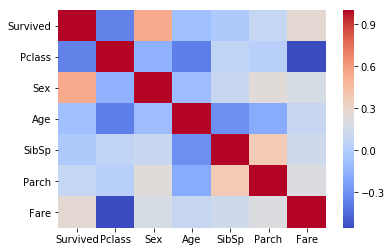

In [63]:
plt.figure()
sns.heatmap(ds.corr(),cmap='coolwarm')
plt.show()

In [68]:
print(ds.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [298]:
class DecisionTree:
    outputColumn = None
    def __init__(self,depth = 0 , maxDepth = 20):
        self.depth = depth
        self.maxDepth = maxDepth
        self.data = None
        self.left = None
        self.right = None
        self.feature = None
        self.value = None
        
        
    def split(self, data, eachColumn, val):
        left_data, right_data = list(), list()
        
        for i in range(data.shape[0]):
            oneRow = data.iloc[i]
            
            if(oneRow[eachColumn] <= val):
                left_data.append(oneRow)
            else:
                right_data.append(oneRow)
                
        left_data = pd.DataFrame(left_data, columns=data.columns).reset_index(drop=True)
        right_data = pd.DataFrame(right_data, columns=data.columns).reset_index(drop=True)
        
        return left_data, right_data
    
    @staticmethod
    def findInformationGain(parent , left, right):
        left_shape = left.shape[0]/parent.shape[0]
        right_shape = 1 - left_shape
        
        if not (left_shape and right_shape):
            return -np.inf
        gain = DecisionTree.entropy(parent) - (left_shape * DecisionTree.entropy(left) + right_shape * DecisionTree.entropy(right))
        return gain
    
    
    @staticmethod
    def entropy(system):
        total = system.shape[0]
        klasses, counts = np.unique(system[DecisionTree.outputColumn].values, return_counts=True)
        ent = 0
        for i,klass in enumerate(klasses):
            p = counts[i] / total
            ent += (-1 * p * np.log2(p))
        return ent
         
        
        
    def getBestSplit(self,data):
        informationGain = []
        
        for eachColumn in data.columns:
            if eachColumn == DecisionTree.outputColumn:
                continue
            
            val = data[eachColumn].mean()
            
            left , right = self.split( data,eachColumn,val)
            gain = DecisionTree.findInformationGain(data,left,right)
            informationGain.append((gain,eachColumn,val))
        
        ans = sorted(informationGain,key = lambda x :x[0], reverse=True)
        return ans[0]
            
            
        
        
        
    def createTree(self):
        print(self.depth)

        gain ,col, val = self.getBestSplit(self.data)
        
        self.feature = col
        self.value = val
        left,right = self.split(self.data, col, val)
        
        if left.shape[0] == 0 or right.shape[0] == 0:
            return
        if self.depth > self.maxDepth:
            return 
        
        self.left = DecisionTree(self.depth+1,self.maxDepth)
        self.right = DecisionTree(self.depth+1,self.maxDepth)
        self.left.data = left
        self.left.createTree()
        self.right.data = right
        self.right.createTree()
    
   
    
    
    @property
    def isLeafNode(self):
        return not(self.right or self.left)
        
    def predict(self,testRow):
        print("Tree Traversal: ",self.feature)
        print("Tree Depth: ",self.depth)
        print('-'*8)
    
        
        if self.isLeafNode:
            survival = self.data[DecisionTree.outputColumn].sum()
            death = self.data.shape[0] - survival
            
            if survival >= death:
                return "Survived"
            else:
                return "Died"
        if testRow[self.feature] <= self.value:
             return self.left.predict(testRow)
        else:
            return self.right.predict(testRow)

     
    def train(self, data, output_column):
            self.data = data
            DecisionTree.outputColumn = output_column
            self.createTree()
        
    
        
        
    def score(self, labels, y_test):
        return (labels == y_test).sum() / y_test.shape[0]

In [299]:
X = ds[[each for each in ds.columns if each != "Survived"]]
Y = pd.DataFrame(ds['Survived'], columns=['Survived'])

In [300]:
split = int(0.8 * ds.shape[0])
X_test = X[split:]
Y_test = Y[split:]
X_test, Y_test = X_test.reset_index(drop=True), Y_test.reset_index(drop=True)

In [301]:
Tree = DecisionTree(maxDepth=5)
Tree.train(ds[:split], output_column='Survived')

0
1
2
3
4
5
6
6
5
6
6
4
5
5
6
6
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6
2
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6
3
4
5
6
6
5
4
5
6
6
5
6
6
1
2
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6
2
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6
3
4
5
6
6
5
6
6
4
5
6
6
5
6
6


In [302]:
#Test
testData = ds[split:]

In [303]:
testData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
571,0,3,0,33.0,0,0,7.7750
572,1,2,1,6.0,0,1,33.0000
573,0,3,0,17.0,1,0,7.0542
574,0,2,0,34.0,0,0,13.0000
575,0,2,0,50.0,0,0,13.0000


In [304]:
print(Tree.predict(testData.loc[581]))
print(testData.loc[581])

Tree Traversal:  Sex
Tree Depth:  0
--------
Tree Traversal:  Pclass
Tree Depth:  1
--------
Tree Traversal:  Age
Tree Depth:  2
--------
Tree Traversal:  SibSp
Tree Depth:  3
--------
Tree Traversal:  Pclass
Tree Depth:  4
--------
Tree Traversal:  Age
Tree Depth:  5
--------
Tree Traversal:  Age
Tree Depth:  6
--------
Survived
Survived      1.0000
Pclass        1.0000
Sex           1.0000
Age          29.0000
SibSp         0.0000
Parch         0.0000
Fare        211.3375
Name: 581, dtype: float64
